In [38]:
from konlpy.tag import Okt
import math, sys

In [48]:
class BayesianFilter:     #붕어빵기계(클래스)
    def __init__(self):   #self:자신(만들어질 객체,붕어빵)
        self.words=set()  #붕어빵.길이=15센티, 단어 저장
        self.word_dict={} #카테고리(광고/중요) 단어 빈도수
        self.category_dict={}  
        
    def split(self, text):#어미/조사/구두점 제외,형태소분석
        result=[]
        okt=Okt()
        malist=okt.pos(text, norm=True, stem=True)
        for word in malist: 
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                result.append(word[0])
        return result
            #print(word[1])        
            #조사,어미,구두점을 제외한 나머지 단어만 
            #result에 저장
    def inc_word(self, word, category):#오늘, 광고
        #단어를 카테고리에 추가
        if not category in self.word_dict:
            self.word_dict[category]={} 
        if not word in self.word_dict[category]:
            self.word_dict[category][word]=0
        self.word_dict[category][word]+=1#{'광고':{'파격':1,'오늘':1} , '중요':{ }}
        self.words.add(word) #{'파격','오늘'}  
    
    def inc_category(self, category):
        if not category in self.category_dict:
            self.category_dict[category]=0
        self.category_dict[category]+=1       
        
    def fit(self,text,category):
        word_list=self.split(text)     
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)
        #print(word_list)
        
# 단어 리스트에 점수 매기기
    def score(self, words, category):
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
        return score
    
    # 예측하기 --- 
    def predict(self, text):#"재고 정리 할인,  배송"
        best_category = None
        max_score = -sys.maxsize 
        words = self.split(text)
        print("words of preFunc:",words)
        score_list = []
        for category in self.category_dict.keys():
            print("category:",category)
            score = self.score(words, category)
            score_list.append((category, score))
            if score > max_score:
                max_score = score
                best_category = category
        return best_category, score_list
    
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
        
    # 카테고리 계산
    def category_prob(self, category):
        print("점수:",self.category_dict.values())
        sum_categories = sum(self.category_dict.values())
        #print(category, "점수:", sum_categories)
        category_v = self.category_dict[category]
        return category_v / sum_categories
        
    # 카테고리 내부의 단어 출현 비율 계산 
    def word_prob(self, word, category):
        n = self.get_word_count(word, category) + 1 
        d = sum(self.word_dict[category].values()) + len(self.words)
        return n / d    
    
    
    

    
    

In [49]:
bf=BayesianFilter()   #붕어빵기계에서 붕어빵 1개 만들어라
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("무료 쿠폰 선물 & 무료 배송", "광고")
bf.fit("아사히 맥주 세일", "광고")
bf.fit("회의 일정 확인 부탁드립니다", "중요")
bf.fit("오늘 일정이 없습니다", "중요")
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
res, scorelist=bf.predict("재고 정리 할인,  배송")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률

# B=중요, A=재고,정리,할인,배송
# P(B|A)=P(B)*P(A|B), P(A|B)=P(Aa1|B)P(Aa2|B)...P(Aan|B)
# P(중요|재고,정리,할인,배송)=P(중요)*P(재고,정리,할인,배송|중요)

res, scorelist=bf.predict("오늘 멀티캠에서 회의는 어땠습니까?")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률


words of preFunc: ['재고', '정리', '할인', '배송']
category: 광고
점수: dict_values([8, 7])
category: 중요
점수: dict_values([8, 7])
결과: 광고
[('광고', -16.058261071143168), ('중요', -17.33467895761303)]
words of preFunc: ['오늘', '멀티', '캠', '회의', '어떻다']
category: 광고
점수: dict_values([8, 7])
category: 중요
점수: dict_values([8, 7])
결과: 중요
[('광고', -21.563592607075527), ('중요', -18.99290703421656)]


In [50]:
from konlpy.tag import Okt

class BayesianFilter:
  
  def __init__(self):
    self.words = set() # 단어 저장
    self.word_dict = {} # 카테고리 단어 빈도수
    self.category_dict = {} # 카테고리(광고 / 중요) 단어 빈도수
  def split(self, text): # 어미/조사/구두점 제외, 형태소 분석
    result = []
    okt = Okt()
    malist = okt.pos(text, norm=True, stem=True)
    for word in malist:
      exceptlist = ["Josa", "Eomi", "Punctuation"]
      # 조사, 어미, 구두점 제외한 나머지 단어만 result에 저장
      if word[1] not in exceptlist:
        result.append(word[0])
    return result
  def inc_word(self, word, category):
    # 단어를 카테고리에 추가
    if not category in self.word_dict:
      self.word_dict[category] = {} # {'광고':{}}
    if not word in self.word_dict[category]:
      self.word_dict[category][word] = 0 # {'광고':{'파격':0}}
    self.word_dict[category][word] += 1 # {'광고':{'파격':1}}
    self.words.add(word) # 

  def inc_category(self, category):
    if not category in self.category_dict:
      self.category_dict[category] = 0
    self.category_dict[category] += 1
    
  # 예측
  def predict(self, text):
    pred_word_list = self.split(text)
    ansdict = {}
    tot_num = 0
    for category in self.category_dict.keys():
      tot_num += self.category_dict[category]
    for category in self.category_dict.keys():
      score_by_cat = 1
      for word in pred_word_list:
        if word not in self.word_dict[category]:
          freq = 1
        else :
          freq = self.word_dict[category][word]
        score_by_cat *= (freq / self.category_dict[category])
      ansdict[category] = score_by_cat * (self.category_dict[category]/tot_num)
    anslist = list(ansdict.items()) # enum list처럼 쓸 수 있음
    anslist.sort(key=lambda x:x[1], reverse=True)
    res = anslist[0][0]
    scorelist = anslist
    
    return res, scorelist
    
  def fit(self, text, category):
    word_list = self.split(text)
    for word in word_list:
      self.inc_word(word, category)
    self.inc_category(category)

In [51]:
res, scorelist=bf.predict("재고 정리 할인,  배송")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률


words of preFunc: ['재고', '정리', '할인', '배송']
category: 광고
점수: dict_values([8, 7])
category: 중요
점수: dict_values([8, 7])
결과: 광고
[('광고', -16.058261071143168), ('중요', -17.33467895761303)]


In [52]:
#keras 선형회귀, 로지스틱 회귀, 소프트맥스

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

In [56]:
x=np.array([1,2,3,4,5,6,7,8,9])#공부시간
y=np.array([12,23,34,45,56,77,88,100,90])#점수
#7.5시간 공부? 점수?
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

W0812 16:03:33.358686  9176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 16:03:33.369810  9176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
9/9 [==============================] - 0s 33ms/step - loss: 583.1417 - mean_squared_error: 583.1417
Epoch 2/300
9/9 [==============================] - 0s 937us/step - loss: 94.0964 - mean_squared_error: 94.0964
Epoch 3/300
9/9 [==============================] - 0s 978us/step - loss: 93.6131 - mean_squared_error: 93.6131
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 93.2059 - mean_squared_error: 93.2059
Epoch 5/300
9/9 [==============================] - 0s 445us/step - loss: 92.8686 - mean_squared_error: 92.8686
Epoch 6/300
9/9 [==============================] - 0s 888us/step - loss: 92.5952 - mean_squared_error: 92.5952
Epoch 7/300
9/9 [==============================] - 0s 889us/step - loss: 92.3802 - mean_squared_error: 92.3802
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 92.2183 - mean_squared_error: 92.2183
Epoch 9/300
9/9 [==============================] - 0s 770us/step - loss: 92.1051 - mean_squared_error: 92.1051
Epoc

Epoch 74/300
9/9 [==============================] - 0s 444us/step - loss: 104.0847 - mean_squared_error: 104.0847
Epoch 75/300
9/9 [==============================] - 0s 445us/step - loss: 104.1960 - mean_squared_error: 104.1960
Epoch 76/300
9/9 [==============================] - 0s 889us/step - loss: 104.3041 - mean_squared_error: 104.3041
Epoch 77/300
9/9 [==============================] - 0s 889us/step - loss: 104.4091 - mean_squared_error: 104.4091
Epoch 78/300
9/9 [==============================] - 0s 653us/step - loss: 104.5111 - mean_squared_error: 104.5111
Epoch 79/300
9/9 [==============================] - 0s 621us/step - loss: 104.6100 - mean_squared_error: 104.6100
Epoch 80/300
9/9 [==============================] - 0s 889us/step - loss: 104.7061 - mean_squared_error: 104.7061
Epoch 81/300
9/9 [==============================] - 0s 444us/step - loss: 104.7994 - mean_squared_error: 104.7994
Epoch 82/300
9/9 [==============================] - 0s 889us/step - loss: 104.8899 - mea

9/9 [==============================] - 0s 444us/step - loss: 107.3360 - mean_squared_error: 107.3360
Epoch 146/300
9/9 [==============================] - 0s 889us/step - loss: 107.3477 - mean_squared_error: 107.3477
Epoch 147/300
9/9 [==============================] - 0s 889us/step - loss: 107.3589 - mean_squared_error: 107.3589
Epoch 148/300
9/9 [==============================] - 0s 889us/step - loss: 107.3697 - mean_squared_error: 107.3697
Epoch 149/300
9/9 [==============================] - 0s 889us/step - loss: 107.3802 - mean_squared_error: 107.3802
Epoch 150/300
9/9 [==============================] - 0s 889us/step - loss: 107.3904 - mean_squared_error: 107.3904
Epoch 151/300
9/9 [==============================] - 0s 889us/step - loss: 107.4002 - mean_squared_error: 107.4002
Epoch 152/300
9/9 [==============================] - 0s 889us/step - loss: 107.4097 - mean_squared_error: 107.4097
Epoch 153/300
9/9 [==============================] - 0s 751us/step - loss: 107.4189 - mean_squ

9/9 [==============================] - 0s 889us/step - loss: 107.6571 - mean_squared_error: 107.6571
Epoch 217/300
9/9 [==============================] - 0s 444us/step - loss: 107.6582 - mean_squared_error: 107.6582
Epoch 218/300
9/9 [==============================] - 0s 912us/step - loss: 107.6592 - mean_squared_error: 107.6592
Epoch 219/300
9/9 [==============================] - 0s 1ms/step - loss: 107.6602 - mean_squared_error: 107.6602
Epoch 220/300
9/9 [==============================] - 0s 889us/step - loss: 107.6612 - mean_squared_error: 107.6612
Epoch 221/300
9/9 [==============================] - 0s 930us/step - loss: 107.6622 - mean_squared_error: 107.6622
Epoch 222/300
9/9 [==============================] - 0s 795us/step - loss: 107.6631 - mean_squared_error: 107.6631
Epoch 223/300
9/9 [==============================] - 0s 975us/step - loss: 107.6640 - mean_squared_error: 107.6640
Epoch 224/300
9/9 [==============================] - 0s 843us/step - loss: 107.6649 - mean_squar

9/9 [==============================] - 0s 444us/step - loss: 107.6870 - mean_squared_error: 107.6870
Epoch 288/300
9/9 [==============================] - 0s 444us/step - loss: 107.6872 - mean_squared_error: 107.6872
Epoch 289/300
9/9 [==============================] - 0s 446us/step - loss: 107.6873 - mean_squared_error: 107.6873
Epoch 290/300
9/9 [==============================] - 0s 444us/step - loss: 107.6874 - mean_squared_error: 107.6874
Epoch 291/300
9/9 [==============================] - 0s 444us/step - loss: 107.6875 - mean_squared_error: 107.6875
Epoch 292/300
9/9 [==============================] - 0s 445us/step - loss: 107.6875 - mean_squared_error: 107.6875
Epoch 293/300
9/9 [==============================] - 0s 445us/step - loss: 107.6876 - mean_squared_error: 107.6876
Epoch 294/300
9/9 [==============================] - 0s 889us/step - loss: 107.6878 - mean_squared_error: 107.6878
Epoch 295/300
9/9 [==============================] - 0s 651us/step - loss: 107.6878 - mean_squ

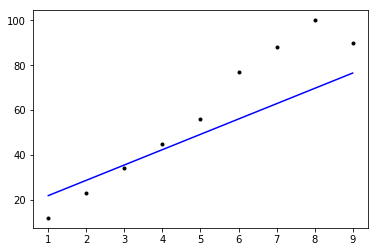

In [59]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b',x,y,'k.')

In [61]:
print(model.predict([7.5]))

[[66.25939]]


In [62]:
#로지스틱 회귀

x=np.array([1,2,3,4,5,6,7,8,9])#공부시간
y=np.array([0,0,0,0,0,1,1,1,1])#합격여부
#7.5시간 공부? 
model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)





W0812 16:23:53.361973  9176 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
9/9 [==============================] - 0s 29ms/step - loss: 3.9840 - binary_accuracy: 0.5556
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 3.0163 - binary_accuracy: 0.5556
Epoch 3/300
9/9 [==============================] - 0s 889us/step - loss: 2.0973 - binary_accuracy: 0.5556
Epoch 4/300
9/9 [==============================] - 0s 889us/step - loss: 1.3132 - binary_accuracy: 0.5556
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 0.8487 - binary_accuracy: 0.5556
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7126 - binary_accuracy: 0.4444
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6902 - binary_accuracy: 0.3333
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6871 - binary_accuracy: 0.4444
Epoch 9/300
9/9 [==============================] - 0s 889us/step - loss: 0.6858 - binary_accuracy: 0.4444
Epoch 10/300
9/9 [==============================] - 0s 84

9/9 [==============================] - 0s 889us/step - loss: 0.5147 - binary_accuracy: 0.7778
Epoch 78/300
9/9 [==============================] - 0s 889us/step - loss: 0.5128 - binary_accuracy: 0.7778
Epoch 79/300
9/9 [==============================] - 0s 444us/step - loss: 0.5109 - binary_accuracy: 0.7778
Epoch 80/300
9/9 [==============================] - 0s 889us/step - loss: 0.5091 - binary_accuracy: 0.7778
Epoch 81/300
9/9 [==============================] - 0s 889us/step - loss: 0.5072 - binary_accuracy: 0.7778
Epoch 82/300
9/9 [==============================] - 0s 889us/step - loss: 0.5054 - binary_accuracy: 0.7778
Epoch 83/300
9/9 [==============================] - 0s 889us/step - loss: 0.5036 - binary_accuracy: 0.7778
Epoch 84/300
9/9 [==============================] - 0s 889us/step - loss: 0.5018 - binary_accuracy: 0.7778
Epoch 85/300
9/9 [==============================] - 0s 889us/step - loss: 0.5001 - binary_accuracy: 0.7778
Epoch 86/300
9/9 [==============================] 

9/9 [==============================] - 0s 890us/step - loss: 0.4070 - binary_accuracy: 0.8889
Epoch 154/300
9/9 [==============================] - 0s 888us/step - loss: 0.4060 - binary_accuracy: 0.8889
Epoch 155/300
9/9 [==============================] - 0s 889us/step - loss: 0.4049 - binary_accuracy: 0.8889
Epoch 156/300
9/9 [==============================] - 0s 445us/step - loss: 0.4039 - binary_accuracy: 0.8889
Epoch 157/300
9/9 [==============================] - 0s 889us/step - loss: 0.4029 - binary_accuracy: 0.8889
Epoch 158/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4018 - binary_accuracy: 0.8889
Epoch 159/300
9/9 [==============================] - 0s 889us/step - loss: 0.4008 - binary_accuracy: 0.8889
Epoch 160/300
9/9 [==============================] - 0s 889us/step - loss: 0.3998 - binary_accuracy: 0.8889
Epoch 161/300
9/9 [==============================] - 0s 889us/step - loss: 0.3988 - binary_accuracy: 0.8889
Epoch 162/300
9/9 [=========================

9/9 [==============================] - 0s 889us/step - loss: 0.3442 - binary_accuracy: 0.8889
Epoch 229/300
9/9 [==============================] - ETA: 0s - loss: 0.1470 - binary_accuracy: 1.000 - 0s 889us/step - loss: 0.3435 - binary_accuracy: 0.8889
Epoch 230/300
9/9 [==============================] - 0s 889us/step - loss: 0.3429 - binary_accuracy: 0.8889
Epoch 231/300
9/9 [==============================] - 0s 889us/step - loss: 0.3422 - binary_accuracy: 0.8889
Epoch 232/300
9/9 [==============================] - 0s 889us/step - loss: 0.3416 - binary_accuracy: 0.8889
Epoch 233/300
9/9 [==============================] - 0s 889us/step - loss: 0.3409 - binary_accuracy: 0.8889
Epoch 234/300
9/9 [==============================] - 0s 889us/step - loss: 0.3403 - binary_accuracy: 0.8889
Epoch 235/300
9/9 [==============================] - 0s 2ms/step - loss: 0.3396 - binary_accuracy: 0.8889
Epoch 236/300
9/9 [==============================] - 0s 889us/step - loss: 0.3390 - binary_accuracy: 0

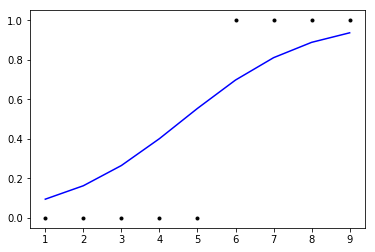

In [63]:
plt.plot(x, model.predict(x), 'b',x,y,'k.')

In [65]:
model.predict([15, 17])
model.predict([0.5, 1.5])

array([[0.07137062],
       [0.12483826]], dtype=float32)

In [67]:
#hx=w1x1+w2x2+w3x3+b
x=np.array([[100,90,80],[55,45,36],[77,88,90]])#중간,기말,최종
y=np.array([92, 70, 88])
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 38ms/step - loss: 15292.8567 - mean_squared_error: 15292.8567
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 964.8978 - mean_squared_error: 964.8978
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 257.9041 - mean_squared_error: 257.9041
Epoch 4/300
3/3 [==============================] - 0s 1ms/step - loss: 265.5106 - mean_squared_error: 265.5106
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: 277.9837 - mean_squared_error: 277.9837
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 280.3875 - mean_squared_error: 280.3875
Epoch 7/300
3/3 [==============================] - 0s 3ms/step - loss: 279.5440 - mean_squared_error: 279.5440
Epoch 8/300
3/3 [==============================] - 0s 3ms/step - loss: 277.8587 - mean_squared_error: 277.8587
Epoch 9/300
3/3 [==============================] - 0s 1ms/step - loss: 275.9834 - mean_squared_error: 275.9

3/3 [==============================] - 0s 1ms/step - loss: 200.6603 - mean_squared_error: 200.6603
Epoch 75/300
3/3 [==============================] - 0s 0us/step - loss: 200.0305 - mean_squared_error: 200.0305
Epoch 76/300
3/3 [==============================] - 0s 1ms/step - loss: 199.4105 - mean_squared_error: 199.4105
Epoch 77/300
3/3 [==============================] - 0s 1ms/step - loss: 198.8011 - mean_squared_error: 198.8011
Epoch 78/300
3/3 [==============================] - 0s 1ms/step - loss: 198.2015 - mean_squared_error: 198.2015
Epoch 79/300
3/3 [==============================] - 0s 2ms/step - loss: 197.6114 - mean_squared_error: 197.6114
Epoch 80/300
3/3 [==============================] - 0s 1ms/step - loss: 197.0310 - mean_squared_error: 197.0310
Epoch 81/300
3/3 [==============================] - 0s 1ms/step - loss: 196.4601 - mean_squared_error: 196.4601
Epoch 82/300
3/3 [==============================] - 0s 1ms/step - loss: 195.8986 - mean_squared_error: 195.8986
Epoch

3/3 [==============================] - 0s 1ms/step - loss: 173.4944 - mean_squared_error: 173.4944
Epoch 147/300
3/3 [==============================] - 0s 1ms/step - loss: 173.2898 - mean_squared_error: 173.2898
Epoch 148/300
3/3 [==============================] - 0s 3ms/step - loss: 173.0882 - mean_squared_error: 173.0882
Epoch 149/300
3/3 [==============================] - 0s 1ms/step - loss: 172.8896 - mean_squared_error: 172.8896
Epoch 150/300
3/3 [==============================] - 0s 1ms/step - loss: 172.6936 - mean_squared_error: 172.6936
Epoch 151/300
3/3 [==============================] - 0s 1ms/step - loss: 172.5006 - mean_squared_error: 172.5006
Epoch 152/300
3/3 [==============================] - 0s 1ms/step - loss: 172.3107 - mean_squared_error: 172.3107
Epoch 153/300
3/3 [==============================] - 0s 1ms/step - loss: 172.1232 - mean_squared_error: 172.1232
Epoch 154/300
3/3 [==============================] - 0s 1ms/step - loss: 171.9383 - mean_squared_error: 171.93

3/3 [==============================] - 0s 1ms/step - loss: 164.1801 - mean_squared_error: 164.1801
Epoch 219/300
3/3 [==============================] - 0s 3ms/step - loss: 164.1040 - mean_squared_error: 164.1040
Epoch 220/300
3/3 [==============================] - 0s 1ms/step - loss: 164.0288 - mean_squared_error: 164.0288
Epoch 221/300
3/3 [==============================] - 0s 1ms/step - loss: 163.9545 - mean_squared_error: 163.9545
Epoch 222/300
3/3 [==============================] - 0s 1ms/step - loss: 163.8811 - mean_squared_error: 163.8811
Epoch 223/300
3/3 [==============================] - 0s 0us/step - loss: 163.8089 - mean_squared_error: 163.8089
Epoch 224/300
3/3 [==============================] - 0s 1ms/step - loss: 163.7373 - mean_squared_error: 163.7373
Epoch 225/300
3/3 [==============================] - 0s 1ms/step - loss: 163.6668 - mean_squared_error: 163.6668
Epoch 226/300
3/3 [==============================] - 0s 1ms/step - loss: 163.5970 - mean_squared_error: 163.59

3/3 [==============================] - 0s 1ms/step - loss: 160.5034 - mean_squared_error: 160.5034
Epoch 291/300
3/3 [==============================] - 0s 1ms/step - loss: 160.4707 - mean_squared_error: 160.4707
Epoch 292/300
3/3 [==============================] - 0s 0us/step - loss: 160.4384 - mean_squared_error: 160.4384
Epoch 293/300
3/3 [==============================] - 0s 1ms/step - loss: 160.4066 - mean_squared_error: 160.4066
Epoch 294/300
3/3 [==============================] - 0s 1ms/step - loss: 160.3750 - mean_squared_error: 160.3750
Epoch 295/300
3/3 [==============================] - 0s 1ms/step - loss: 160.3438 - mean_squared_error: 160.3438
Epoch 296/300
3/3 [==============================] - 0s 1ms/step - loss: 160.3128 - mean_squared_error: 160.3128
Epoch 297/300
3/3 [==============================] - 0s 1ms/step - loss: 160.2822 - mean_squared_error: 160.2822
Epoch 298/300
3/3 [==============================] - 0s 3ms/step - loss: 160.2520 - mean_squared_error: 160.25

In [68]:
model.predict(x) #[92, 70, 88]

array([[105.36288],
       [ 56.78319],
       [ 84.98882]], dtype=float32)

In [69]:
#다중 로지스틱 회귀
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1])
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 41ms/step - loss: 0.8495 - binary_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 1000us/step - loss: 0.8385 - binary_accuracy: 0.2500
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8278 - binary_accuracy: 0.2500
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8174 - binary_accuracy: 0.2500
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8073 - binary_accuracy: 0.2500
Epoch 6/300
4/4 [==============================] - 0s 1000us/step - loss: 0.7975 - binary_accuracy: 0.2500
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7880 - binary_accuracy: 0.2500
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7787 - binary_accuracy: 0.2500
Epoch 9/300
4/4 [==============================] - 0s 1000us/step - loss: 0.7697 - binary_accuracy: 0.2500
Epoch 10/300
4/4 [==============================] - 0s

4/4 [==============================] - 0s 1000us/step - loss: 0.4963 - binary_accuracy: 0.7500
Epoch 78/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4947 - binary_accuracy: 0.7500
Epoch 79/300
4/4 [==============================] - 0s 999us/step - loss: 0.4931 - binary_accuracy: 0.7500
Epoch 80/300
4/4 [==============================] - 0s 1000us/step - loss: 0.4915 - binary_accuracy: 0.7500
Epoch 81/300
4/4 [==============================] - 0s 998us/step - loss: 0.4900 - binary_accuracy: 0.7500
Epoch 82/300
4/4 [==============================] - 0s 1000us/step - loss: 0.4884 - binary_accuracy: 0.7500
Epoch 83/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4869 - binary_accuracy: 0.7500
Epoch 84/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4855 - binary_accuracy: 0.7500
Epoch 85/300
4/4 [==============================] - 0s 1000us/step - loss: 0.4840 - binary_accuracy: 0.7500
Epoch 86/300
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.4190 - binary_accuracy: 0.7500
Epoch 154/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4183 - binary_accuracy: 0.7500
Epoch 155/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4176 - binary_accuracy: 0.7500
Epoch 156/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4170 - binary_accuracy: 0.7500
Epoch 157/300
4/4 [==============================] - 0s 0us/step - loss: 0.4163 - binary_accuracy: 0.7500
Epoch 158/300
4/4 [==============================] - 0s 1000us/step - loss: 0.4157 - binary_accuracy: 0.7500
Epoch 159/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4150 - binary_accuracy: 0.7500
Epoch 160/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4144 - binary_accuracy: 0.7500
Epoch 161/300
4/4 [==============================] - 0s 999us/step - loss: 0.4137 - binary_accuracy: 0.7500
Epoch 162/300
4/4 [==============================] - 0s

4/4 [==============================] - 0s 1ms/step - loss: 0.3773 - binary_accuracy: 0.7500
Epoch 229/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3769 - binary_accuracy: 0.7500
Epoch 230/300
4/4 [==============================] - 0s 1000us/step - loss: 0.3764 - binary_accuracy: 0.7500
Epoch 231/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3759 - binary_accuracy: 0.7500
Epoch 232/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3755 - binary_accuracy: 0.7500
Epoch 233/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3750 - binary_accuracy: 0.7500
Epoch 234/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3745 - binary_accuracy: 0.7500
Epoch 235/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3741 - binary_accuracy: 0.7500
Epoch 236/300
4/4 [==============================] - 0s 1000us/step - loss: 0.3736 - binary_accuracy: 0.7500
Epoch 237/300
4/4 [==============================] - 0

In [70]:
model.predict(x)

array([[0.59313333],
       [0.84702414],
       [0.78139937],
       [0.9313974 ]], dtype=float32)

In [71]:
#소프트맥스 분류

In [73]:
import pandas as pd
data=pd.read_csv("data/iris.csv")

FileNotFoundError: [Errno 2] File b'data/iris.csv' does not exist: b'data/iris.csv'